In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [97]:
df = pd.read_csv("Different_stores_dataset.csv")
# To display top 5 rows
df.head(5)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   invoice_no              99457 non-null  object 
 1   invoice_date            99457 non-null  object 
 2   customer_id             99457 non-null  object 
 3   gender                  99457 non-null  object 
 4   age                     99457 non-null  int64  
 5   category                99457 non-null  object 
 6   quantity                99457 non-null  int64  
 7   selling_price_per_unit  99457 non-null  float64
 8   cost_price_per_unit     99457 non-null  float64
 9   payment_method          99457 non-null  object 
 10  region                  99457 non-null  object 
 11  state                   99457 non-null  object 
 12  shopping_mall           99457 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB


### 1. Check missing values and duplicate records

In [99]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64

In [100]:
# Check for duplicate records
duplicates = df.duplicated()
print(f"Number of duplicate records: {duplicates.sum()}")

Number of duplicate records: 0


### 2. Add column name 'Total Sales'

In [101]:
# Check the initial DataFrame
print("Initial DataFrame:")
print(df.head())

Initial DataFrame:
  invoice_no     invoice_date customer_id  gender  age  category  quantity  \
0    I138884  10/30/2016 9:58     C241288  Female   28  Clothing         5   
1    I317333  10/30/2016 9:58     C111565    Male   21     Shoes         3   
2    I127801  10/30/2016 9:58     C266599    Male   20  Clothing         1   
3    I173702  10/30/2016 9:58     C988172  Female   66     Shoes         5   
4    I337046  10/30/2016 9:59     C189076  Female   53     Books         4   

   selling_price_per_unit  cost_price_per_unit payment_method region  \
0                 1500.40             1425.380    Credit Card  South   
1                 1800.51             1620.459     Debit Card  South   
2                  300.08              295.060           Cash   West   
3                 3000.85             2900.765    Credit Card  South   
4                   60.60               45.450           Cash  South   

        state   shopping_mall  
0    Kentucky          Kanyon  
1    Kentucky  

In [102]:
# Add a new column 'Total Sales'
df['Total Sales'] = 0 
# df.head(10)
print(df.head())

  invoice_no     invoice_date customer_id  gender  age  category  quantity  \
0    I138884  10/30/2016 9:58     C241288  Female   28  Clothing         5   
1    I317333  10/30/2016 9:58     C111565    Male   21     Shoes         3   
2    I127801  10/30/2016 9:58     C266599    Male   20  Clothing         1   
3    I173702  10/30/2016 9:58     C988172  Female   66     Shoes         5   
4    I337046  10/30/2016 9:59     C189076  Female   53     Books         4   

   selling_price_per_unit  cost_price_per_unit payment_method region  \
0                 1500.40             1425.380    Credit Card  South   
1                 1800.51             1620.459     Debit Card  South   
2                  300.08              295.060           Cash   West   
3                 3000.85             2900.765    Credit Card  South   
4                   60.60               45.450           Cash  South   

        state   shopping_mall  Total Sales  
0    Kentucky          Kanyon            0  
1    Ken

### 3. How many customers have age more than 60?

In [103]:
# Count customers older than 60
customers_over_60 = df[df['age'] > 60]
# print(customers_over_60)
customers_over_60

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM,0
8,I293455,10/30/2016 10:00,C159642,Male,69,Clothing,3,900.24,675.180,Credit Card,West,California,Metrocity,0
12,I640508,10/30/2016 10:00,C225330,Female,67,Toys,4,143.36,144.688,Debit Card,South,North Carolina,Metrocity,0
14,I336189,10/30/2016 10:01,C555402,Female,67,Clothing,2,600.16,580.720,Credit Card,Central,Texas,Kanyon,0
16,I294687,10/30/2016 10:01,C300786,Male,65,Books,2,30.30,27.210,Debit Card,Central,Iowa,Metrocity,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99427,I934204,11/15/2016 12:37,C188412,Female,62,Cosmetics,4,162.64,130.112,Cash,West,California,Viaport Outlet,0
99435,I141871,11/15/2016 12:39,C298790,Female,62,Clothing,3,900.24,675.180,Cash,East,Ohio,Zorlu Center,0
99448,I332105,11/15/2016 12:42,C231387,Female,65,Shoes,4,2400.68,2280.646,Credit Card,East,Pennsylvania,Metropol AVM,0
99449,I134399,11/15/2016 12:42,C953724,Male,65,Clothing,1,300.08,225.060,Cash,West,California,Kanyon,0


In [104]:
# Count customers older than 60 :
count_over_60 = customers_over_60.shape[0]
count_over_60

17169

### 4. How many unique customer_id entries are there? Do any customers make multiple purchases?

In [105]:
# Count unique customer_id entries
unique_customers = df['customer_id'].nunique() 
unique_customers 

99457

In [106]:
# Check for customers with multiple purchases
multiple_purchases = df.groupby('customer_id').filter(lambda x: len(x) > 1)
multiple_purchases

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales


In [107]:
# Count the number of customers with multiple purchases
customers_with_multiple_purchases = multiple_purchases['customer_id'].nunique()
customers_with_multiple_purchases

0

### 5. Are there more male or female customers, Show in Pie Chart?

In [108]:
# Count the number of male and female customers
gender_counts = df['gender'].value_counts() 
gender_counts

gender
Female    59482
Male      39975
Name: count, dtype: int64

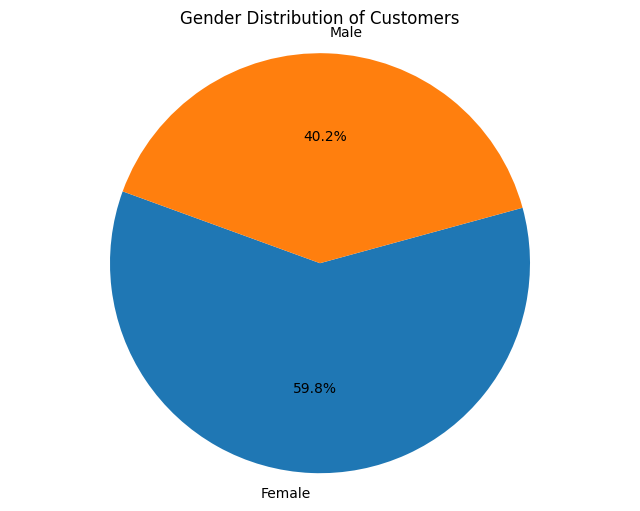

In [109]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=160)
plt.title('Gender Distribution of Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

### 6. Which category is least popular among customers?

In [110]:
# Count the number of entries per category
category_counts = df['category'].value_counts()
category_counts

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [111]:
# Identify the least popular category
least_popular_category = category_counts.idxmin()
least_popular_count = category_counts.min()
least_popular_count

4981

### 7. Which category has the highest sales volume?

In [112]:
# Group by category and sum the sales
sales_volume_by_category = df.groupby('category')['quantity'].sum()
sales_volume_by_category

category
Books               14989
Clothing           103598
Cosmetics           45501
Food & Beverage     44281
Shoes               30217
Souvenir            14871
Technology          15033
Toys                30321
Name: quantity, dtype: int64

In [113]:
# Identify the category with the highest sales volume
highest_sales_category = sales_volume_by_category.idxmax()
highest_sales_volume = sales_volume_by_category.max()
highest_sales_volume
# Output the results
print(f"The category with the highest sales volume is: '{highest_sales_category}' with a total sales volume of {highest_sales_volume}.")

The category with the highest sales volume is: 'Clothing' with a total sales volume of 103598.


In [114]:
print(df.head())

  invoice_no     invoice_date customer_id  gender  age  category  quantity  \
0    I138884  10/30/2016 9:58     C241288  Female   28  Clothing         5   
1    I317333  10/30/2016 9:58     C111565    Male   21     Shoes         3   
2    I127801  10/30/2016 9:58     C266599    Male   20  Clothing         1   
3    I173702  10/30/2016 9:58     C988172  Female   66     Shoes         5   
4    I337046  10/30/2016 9:59     C189076  Female   53     Books         4   

   selling_price_per_unit  cost_price_per_unit payment_method region  \
0                 1500.40             1425.380    Credit Card  South   
1                 1800.51             1620.459     Debit Card  South   
2                  300.08              295.060           Cash   West   
3                 3000.85             2900.765    Credit Card  South   
4                   60.60               45.450           Cash  South   

        state   shopping_mall  Total Sales  
0    Kentucky          Kanyon            0  
1    Ken

### 8. Add column name 'Total Profit'

Total Profit=Total Sales−Total Costs

In [115]:
# Calculate Total Profit
df['Total Sales'] = df['selling_price_per_unit'] - df['cost_price_per_unit']  

In [116]:
print(df.head())

  invoice_no     invoice_date customer_id  gender  age  category  quantity  \
0    I138884  10/30/2016 9:58     C241288  Female   28  Clothing         5   
1    I317333  10/30/2016 9:58     C111565    Male   21     Shoes         3   
2    I127801  10/30/2016 9:58     C266599    Male   20  Clothing         1   
3    I173702  10/30/2016 9:58     C988172  Female   66     Shoes         5   
4    I337046  10/30/2016 9:59     C189076  Female   53     Books         4   

   selling_price_per_unit  cost_price_per_unit payment_method region  \
0                 1500.40             1425.380    Credit Card  South   
1                 1800.51             1620.459     Debit Card  South   
2                  300.08              295.060           Cash   West   
3                 3000.85             2900.765    Credit Card  South   
4                   60.60               45.450           Cash  South   

        state   shopping_mall  Total Sales  
0    Kentucky          Kanyon       75.020  
1    Ken

In [117]:
# Save the updated DataFrame back to the CSV
df.to_csv('Updatedata_sales.csv', index=False)

# Save Udated Data Sales in df1

In [118]:
df1 = pd.read_csv('Updatedata_sales.csv')
df1

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon,75.0200
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet,180.0510
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity,5.0200
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM,100.0850
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon,15.1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon,14.6625
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet,3.1380
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity,3.1380
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park,420.0000


### 9. Display the top 10 invoices with the highest quantities sold?

In [119]:
# Sort the DataFrame by quantity sold in descending order
top_invoices = df.sort_values(by='quantity', ascending=False).head(10) 
top_invoices

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
100,I283443,10/30/2016 10:21,C189493,Male,43,Technology,15,3150.00,2677.500,Credit Card,Central,Illinois,Viaport Outlet,472.500
275,I282789,10/30/2016 11:02,C172185,Female,67,Cosmetics,12,81.32,76.924,Cash,West,Idaho,Istinye Park,4.396
109,I293215,10/30/2016 10:23,C166635,Male,18,Cosmetics,12,162.64,130.112,Credit Card,Central,Illinois,Istinye Park,32.528
305,I115679,10/30/2016 11:09,C266462,Male,27,Clothing,11,300.08,285.060,Cash,Central,Michigan,Kanyon,15.020
129,I160221,10/30/2016 10:28,C319231,Male,25,Clothing,10,900.24,675.180,Cash,West,Oregon,Mall of Istanbul,225.060
61,I207205,10/30/2016 10:12,C716161,Female,33,Clothing,10,300.08,225.060,Debit Card,East,New York,Kanyon,75.020
224,I353272,10/30/2016 10:50,C199311,Female,34,Clothing,10,300.08,292.060,Credit Card,East,Ohio,Istinye Park,8.020
201,I286193,10/30/2016 10:45,C322994,Male,37,Cosmetics,9,121.98,118.485,Cash,West,Colorado,Istinye Park,3.495
145,I246375,10/30/2016 10:32,C236365,Female,67,Cosmetics,8,81.32,56.924,Cash,West,Oregon,Kanyon,24.396
11,I139207,10/30/2016 10:00,C191708,Female,29,Books,8,15.15,15.105,Credit Card,West,Idaho,Zorlu Center,0.045


In [120]:
# Output the top 10 invoices
print("\nTop 10 Invoices with the Highest Quantities Sold:")
print(top_invoices[['invoice_no', 'quantity']]) 


Top 10 Invoices with the Highest Quantities Sold:
    invoice_no  quantity
100    I283443        15
275    I282789        12
109    I293215        12
305    I115679        11
129    I160221        10
61     I207205        10
224    I353272        10
201    I286193         9
145    I246375         8
11     I139207         8


### 10. Which payment method is most commonly used?

In [121]:
# Count the number of occurrences of each payment method
payment_counts = df['payment_method'].value_counts()
payment_counts

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [122]:
# Identify the most commonly used payment method
most_common_payment_method = payment_counts.idxmax()
most_common_count = payment_counts.max()

# Output the results
print(f"The most commonly used payment method is: '{most_common_payment_method}' with {most_common_count} occurrences.")

The most commonly used payment method is: 'Cash' with 44447 occurrences.


### 11. Total Sales with respect to region?

In [123]:
# Group by region and sum the sales
total_sales_by_region = df.groupby('region')['Total Sales'].sum()
total_sales_by_region

region
Central    1.945985e+06
East       2.416917e+06
South      1.356742e+06
West       2.648913e+06
Name: Total Sales, dtype: float64

In [124]:
# Output the total sales for each region
print("\nTotal Sales with respect to Region:")
print(total_sales_by_region)


Total Sales with respect to Region:
region
Central    1.945985e+06
East       2.416917e+06
South      1.356742e+06
West       2.648913e+06
Name: Total Sales, dtype: float64


### 12. Sort Malls with average sales higher to lower?

In [125]:
# Group by mall and calculate the average sales
average_sales_by_mall = df.groupby('shopping_mall')['Total Sales'].mean()
average_sales_by_mall

shopping_mall
Istinye Park        83.415088
Kanyon              83.997106
Mall of Istanbul    84.700919
Metrocity           84.066586
Metropol AVM        83.606480
Viaport Outlet      83.814096
Zorlu Center        85.398701
Name: Total Sales, dtype: float64

In [126]:
# Sort the malls by average sales in descending order
sorted_malls = average_sales_by_mall.sort_values(ascending=False)
sorted_malls 

shopping_mall
Zorlu Center        85.398701
Mall of Istanbul    84.700919
Metrocity           84.066586
Kanyon              83.997106
Viaport Outlet      83.814096
Metropol AVM        83.606480
Istinye Park        83.415088
Name: Total Sales, dtype: float64

In [127]:
# Output the sorted list of malls
print("\nMalls sorted by average sales (higher to lower):")
print(sorted_malls)


Malls sorted by average sales (higher to lower):
shopping_mall
Zorlu Center        85.398701
Mall of Istanbul    84.700919
Metrocity           84.066586
Kanyon              83.997106
Viaport Outlet      83.814096
Metropol AVM        83.606480
Istinye Park        83.415088
Name: Total Sales, dtype: float64


### 13. Sort categories with the highest profit margins display in bar plot?

Profit Margin=(Total Sales/Total Profit)×100

In [138]:
df['Total Profit'] = 0
df['Profit Margin'] = 0
# df.head(10)
print(df.head())

  invoice_no     invoice_date customer_id  gender  age  category  quantity  \
0    I138884  10/30/2016 9:58     C241288  Female   28  Clothing         5   
1    I317333  10/30/2016 9:58     C111565    Male   21     Shoes         3   
2    I127801  10/30/2016 9:58     C266599    Male   20  Clothing         1   
3    I173702  10/30/2016 9:58     C988172  Female   66     Shoes         5   
4    I337046  10/30/2016 9:59     C189076  Female   53     Books         4   

   selling_price_per_unit  cost_price_per_unit payment_method region  \
0                 1500.40             1425.380    Credit Card  South   
1                 1800.51             1620.459     Debit Card  South   
2                  300.08              295.060           Cash   West   
3                 3000.85             2900.765    Credit Card  South   
4                   60.60               45.450           Cash  South   

        state   shopping_mall  Total Sales  Total Profit  Profit Margin  
0    Kentucky          K

In [137]:
total_sales = df['selling_price_per_unit'].sum()
total_sales

68551365.91

In [133]:
df['selling_price_per_unit'].sum() 
df['cost_price_per_unit'].sum()


8368557.30399999

In [135]:
Total_Profit = df['selling_price_per_unit'].sum() -  df['cost_price_per_unit'].sum()
Total_Profit


8368557.30399999

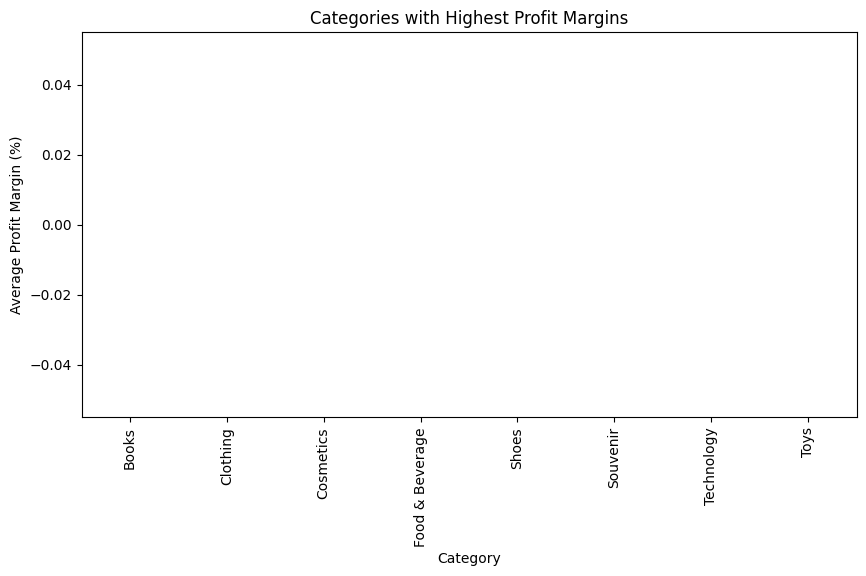

In [141]:
df['Profit Margin'] = (df['Total Profit'] / df['Total Sales']) * 100
avg_profit_margin_by_category = df.groupby('category')['Profit Margin'].mean()
sorted_categories_by_profit_margin = avg_profit_margin_by_category.sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sorted_categories_by_profit_margin.plot(kind='bar', color='green')
plt.title("Categories with Highest Profit Margins")
plt.xlabel("Category")
plt.ylabel("Average Profit Margin (%)")
plt.show()

### 14.  What is the total number of transactions per region for each payment method?

In [84]:
# Assuming there are 'region' and 'payment_method' columns
# Group by region and payment method and count the number of transactions
transaction_counts = df.groupby(['region', 'payment_method']).size().reset_index(name='transaction_count')

# Output the total number of transactions per region for each payment method
print("\nTotal Number of Transactions per Region for Each Payment Method:")
print(transaction_counts)


Total Number of Transactions per Region for Each Payment Method:
     region payment_method  transaction_count
0   Central           Cash              10319
1   Central    Credit Card               8140
2   Central     Debit Card               4640
3      East           Cash              12738
4      East    Credit Card               9817
5      East     Debit Card               5751
6     South           Cash               7227
7     South    Credit Card               5698
8     South     Debit Card               3284
9      West           Cash              14163
10     West    Credit Card              11276
11     West     Debit Card               6404


### 15. How do sales in different categories compare between males and females?

In [ ]:
# Assuming there are 'gender', 'category', and 'sales' columns
# Group by gender and category and sum the sales
sales_comparison = df.groupby(['gender', 'category'])['Total Sales'].sum().unstack()

In [87]:
# Output the total sales for each category by gender
print("\nSales in Different Categories Compared Between Males and Females:")
print(sales_comparison)


Sales in Different Categories Compared Between Males and Females:
category       Books     Clothing   Cosmetics  Food & Beverage        Shoes  \
gender                                                                        
Female    35916.1500  2422783.396  254777.352       37224.1860  1036233.573   
Male      25363.4325  1618561.628  169911.800       25316.6455   709400.940   

category    Souvenir  Technology        Toys  
gender                                        
Female    28542.0225   1032990.0  150933.456  
Male      18696.9745    703132.5   98773.248  
